# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [109]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [95]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [96]:
#Shape
shape_spaceship = spaceship.shape
shape_spaceship

(8693, 14)

**Check for data types**

In [97]:
#Data Types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [98]:
# Missing values

missing_values = spaceship.isnull().sum()
missing_values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [99]:
# Removing rows with missing data

spaceship_without_null = spaceship.dropna()


In [100]:
missing_values = spaceship_without_null.isnull().sum()
missing_values

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [101]:
#Shape and head without nulls, 
shape_spaceship_without_null = spaceship_without_null.shape
shape_spaceship_without_null

spaceship_without_null_head = spaceship_without_null.head()

shape_spaceship_without_null

(6606, 14)

In [102]:
spaceship_without_null_head

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [103]:
# Convertir 'Transported' a numérico usando .loc
spaceship_without_null.loc[:, 'Transported'] = spaceship_without_null['Transported'].astype(int)

# Seleccionar características numéricas
features = spaceship_without_null[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]


/Users/juanfransf/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [104]:
spaceship_without_null.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


And also lets define our target.

In [110]:
# Define target
target = spaceship_without_null['Transported']

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [111]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [123]:
# Creating an instance of the model
#PROBAR CON VARIOS K Y LANZAR GRÁFICAS
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)

Fit the model to your data.

In [124]:
# Entrenar el modelo KNN

knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train) 
knn7.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [125]:
y_pred3 = knn3.predict(X_test)
y_pred5 = knn5.predict(X_test)
y_pred7 = knn7.predict(X_test)

Evaluate your model.

In [126]:
# Evaluar el modelo
accuracy3 = knn3.score(X_test, y_test)
accuracy5 = knn5.score(X_test, y_test)
accuracy7 = knn7.score(X_test, y_test)
print(f"Accuracy K=3: {accuracy3}")
print(f"Accuracy K=5: {accuracy5}")
print(f"Accuracy K=7: {accuracy7}")

Accuracy K=3: 0.7594553706505295
Accuracy K=5: 0.7715582450832073
Accuracy K=7: 0.7829046898638427


In [127]:
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)

precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)

precision7 = precision_score(y_test, y_pred7)
recall7 = recall_score(y_test, y_pred7)

print(f"Precision K=3: {precision3}")
print(f"Recall K=3: {recall3}")
print(f"Precision K=5: {precision5}")
print(f"Recall K=5: {recall5}")
print(f"Precision K=7: {precision7}")
print(f"Recall K=7: {recall7}")

Precision K=3: 0.7394270122783083
Recall K=3: 0.8101644245142003
Precision K=5: 0.7595473833097596
Recall K=5: 0.8026905829596412
Precision K=7: 0.7588075880758808
Recall K=7: 0.8370702541106129


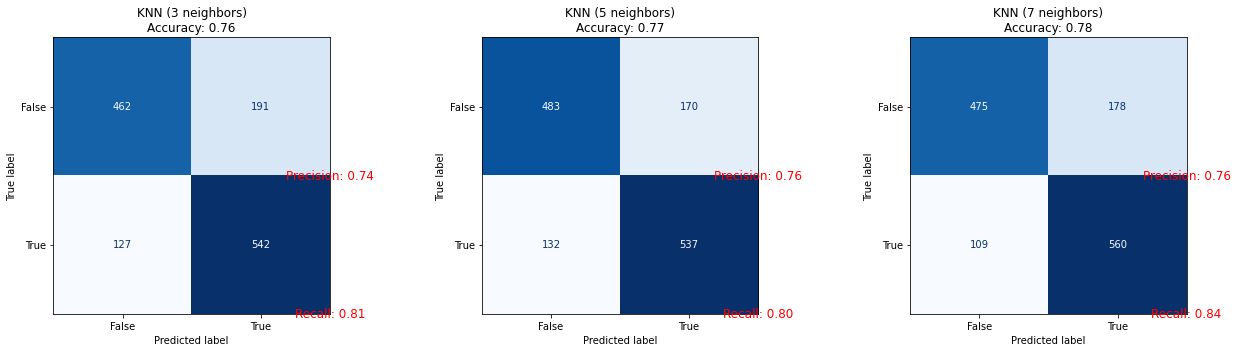

In [133]:
# Calcular las matrices de confusión
cm3 = confusion_matrix(y_test, y_pred3)
cm5 = confusion_matrix(y_test, y_pred5)
cm7 = confusion_matrix(y_test, y_pred7)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN con k=3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[False, True])
disp3.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title(f'KNN (3 neighbors)\nAccuracy: {accuracy3:.2f}')
axes[0].text(1.5, 0.5, f'Precision: {precision3:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
axes[0].text(1.5, 1.5, f'Recall: {recall3:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# KNN con k=5
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=[False, True])
disp5.plot(cmap=plt.cm.Blues, ax=axes[1], colorbar=False)
axes[1].set_title(f'KNN (5 neighbors)\nAccuracy: {accuracy5:.2f}')
axes[1].text(1.5, 0.5, f'Precision: {precision5:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
axes[1].text(1.5, 1.5, f'Recall: {recall5:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# KNN con k=7
disp7 = ConfusionMatrixDisplay(confusion_matrix=cm7, display_labels=[False, True])
disp7.plot(cmap=plt.cm.Blues, ax=axes[2], colorbar=False)
axes[2].set_title(f'KNN (7 neighbors)\nAccuracy: {accuracy7:.2f}')
axes[2].text(1.5, 0.5, f'Precision: {precision7:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
axes[2].text(1.5, 1.5, f'Recall: {recall7:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()


**Congratulations, you have just developed your first Machine Learning model!**